Посмотрим, как обучать решающие деревья в python.

In [1]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Будем предсказывать стоимость домов в Калифорнии.

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Разобъем данные на тренировочную и тестовые части. Обучим дерево на трейне и оценим качество ($R^2$) на тесте.

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [5]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [6]:
from sklearn.metrics import r2_score

pred = model.predict(Xtest)

r2_score(ytest, pred)

0.6027829085576974

In [7]:
pred_train = model.predict(Xtrain)

r2_score(ytrain, pred_train)

1.0

Дерево сильно переобучилось! 

Попробуем ограничить его по глубине.

2 0.45120526546918793 0.4308859489546041
5 0.6307083244816962 0.6018796993971511
8 0.7551678130970392 0.6773632917612694
11 0.8675965023226979 0.6798988119244289
14 0.9446411229582562 0.6385413314748589
17 0.9828104995385228 0.6207305196937137
20 0.995943271035502 0.6041600338107669
23 0.9991749479711821 0.6060462485754865
26 0.9999171373512237 0.6081951166677608


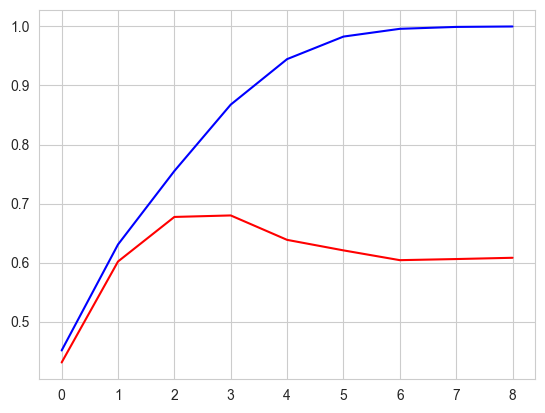

In [8]:
from matplotlib import pyplot as plt

train_scores = []
test_scores = []

for depth in [2, 5, 8, 11, 14, 17, 20, 23, 26]:
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(Xtrain, ytrain)

    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)

    train_r2 = r2_score(ytrain, pred_train)
    test_r2 = r2_score(ytest, pred_test)

    train_scores.append(train_r2) 
    test_scores.append(test_r2)

    print(depth, train_r2, test_r2)

plt.plot(train_scores, color='blue')
plt.plot(test_scores, color='red')
plt.show()

Кросс-валидация

Судя по результатам эксперимента, оптимальная глубина дерева max_depth = 8. Но это мы узнали по конкретному разбиению на train-test.

Чтобы не привязываться к конкретному разбиению, можно посмотреть качество модели по кросс-валидации. 

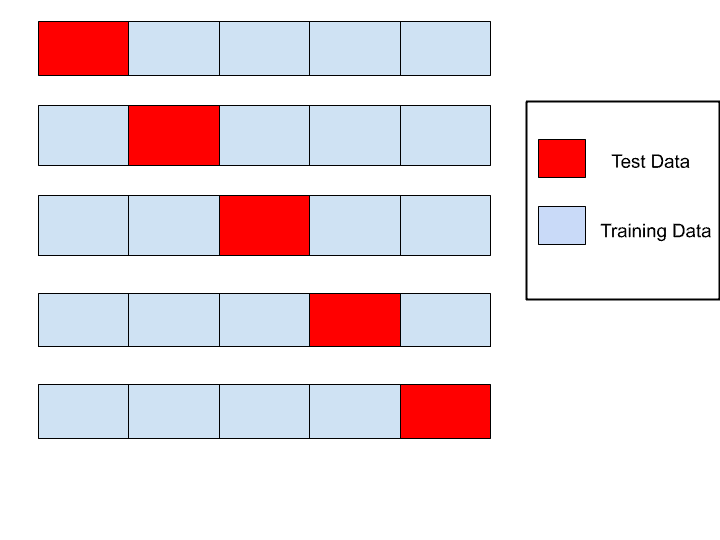

In [9]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(max_depth = 8)

cross_val_score(model, X, y, cv=3, scoring='r2')

array([0.47486122, 0.60492479, 0.46767808])

In [10]:
cross_val_score(model, X, y, cv=3, scoring='r2').mean()

0.5152854131647411

Решающее дерево можно визуализировать.

Это очень удобно для интерпретации результатов.

In [11]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=3)

In [17]:
# !pip install -q dtreeviz

In [18]:
import dtreeviz

viz_model = dtreeviz.model(model, Xtrain, ytrain, 
                           feature_names=Xtrain.columns)

viz_model.view(fancy = False, scale = 2)

C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH